In [1]:
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('mortgage_dataset4.csv')

In [3]:
df.head()

,record_date,mortgage_rate,consumer_goods_production,cpi,household_net_worth,industrial_production,rates_3months,job_openings,money_supply,money_velocity,3monthForecast,6monthForecast,12monthForecast
0,2001-01,7.0325,103.0259,175.6,41994416,91.8903,5.62,5234,4981.02,2.085,7.0775,7.1275,6.9975
1,2001-04,7.0775,102.6877,176.4,43198401,90.7293,4.53,4615,5167.06,2.059,7.1275,6.6175,6.9850
2,2001-07,7.1275,102.2020,177.4,42164052,89.2260,3.66,4447,5182.80,2.014,6.6175,6.9975,6.4850
3,2001-10,6.6175,102.4001,177.6,43746475,88.3926,2.31,3707,5316.20,1.980,6.9975,6.9850,6.1125
4,2002-01,6.9975,103.8754,177.7,44391512,88.4665,1.74,3699,5455.30,1.969,6.9850,6.4850,5.9160


In [4]:
#3 months forecast
X=df.drop(['3monthForecast','record_date','mortgage_rate','6monthForecast','12monthForecast'],axis=1)
y=df[['3monthForecast']]
X.head()

,consumer_goods_production,cpi,household_net_worth,industrial_production,rates_3months,job_openings,money_supply,money_velocity
0,103.0259,175.6,41994416,91.8903,5.62,5234,4981.02,2.085
1,102.6877,176.4,43198401,90.7293,4.53,4615,5167.06,2.059
2,102.2020,177.4,42164052,89.2260,3.66,4447,5182.80,2.014
3,102.4001,177.6,43746475,88.3926,2.31,3707,5316.20,1.980
4,103.8754,177.7,44391512,88.4665,1.74,3699,5455.30,1.969


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_scaled=scaler.transform(X)

In [7]:
model = Sequential()
model.add(Dense(128,input_dim=8,activation='relu'))        
model.add(Dense(64,activation='relu'))    
model.add(Dense(1,activation='linear'))

In [8]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history=model.fit(X_train_scaled,y_train,validation_split=0.2,epochs=100)

Epoch 1/100


2/2 [==============================] - 3s 506ms/step - loss: 22.3192 - mae: 4.6169 - val_loss: 24.1559 - val_mae: 4.7525
Epoch 2/100
2/2 [==============================] - 0s 91ms/step - loss: 20.0288 - mae: 4.3644 - val_loss: 21.7866 - val_mae: 4.4814
Epoch 3/100
2/2 [==============================] - 0s 78ms/step - loss: 17.8491 - mae: 4.1111 - val_loss: 19.5120 - val_mae: 4.2029
Epoch 4/100
2/2 [==============================] - 0s 81ms/step - loss: 15.8181 - mae: 3.8588 - val_loss: 17.3634 - val_mae: 3.9212
Epoch 5/100
2/2 [==============================] - 0s 90ms/step - loss: 13.8417 - mae: 3.5951 - val_loss: 15.2918 - val_mae: 3.6340
Epoch 6/100
2/2 [==============================] - 0s 90ms/step - loss: 12.0617 - mae: 3.3380 - val_loss: 13.3256 - val_mae: 3.3391
Epoch 7/100
2/2 [==============================] - 0s 83ms/step - loss: 10.3198 - mae: 3.0647 - val_loss: 11.4731 - val_mae: 3.1257
Epoch 8/100
2/2 [==============================] - 0s 79ms/step - loss: 8

2/2 [==============================] - 0s 87ms/step - loss: 0.2329 - mae: 0.3796 - val_loss: 0.5988 - val_mae: 0.5436
Epoch 61/100
2/2 [==============================] - 0s 92ms/step - loss: 0.2306 - mae: 0.3779 - val_loss: 0.5866 - val_mae: 0.5375
Epoch 62/100
2/2 [==============================] - 0s 95ms/step - loss: 0.2287 - mae: 0.3764 - val_loss: 0.5754 - val_mae: 0.5321
Epoch 63/100
2/2 [==============================] - 0s 87ms/step - loss: 0.2256 - mae: 0.3737 - val_loss: 0.5698 - val_mae: 0.5288
Epoch 64/100
2/2 [==============================] - 0s 92ms/step - loss: 0.2237 - mae: 0.3724 - val_loss: 0.5622 - val_mae: 0.5242
Epoch 65/100
2/2 [==============================] - 0s 91ms/step - loss: 0.2219 - mae: 0.3712 - val_loss: 0.5617 - val_mae: 0.5246
Epoch 66/100
2/2 [==============================] - 0s 88ms/step - loss: 0.2190 - mae: 0.3682 - val_loss: 0.5560 - val_mae: 0.5239
Epoch 67/100
2/2 [==============================] - 0s 86ms/step - loss: 0.2170 - mae: 0.3655 - 

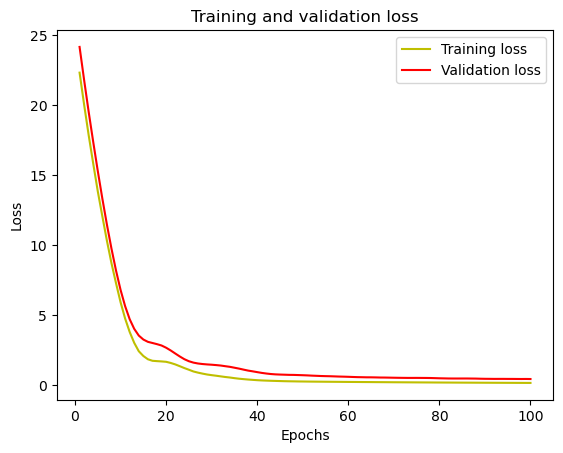

In [10]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step


<Axes: title={'center': 'ANN'}>

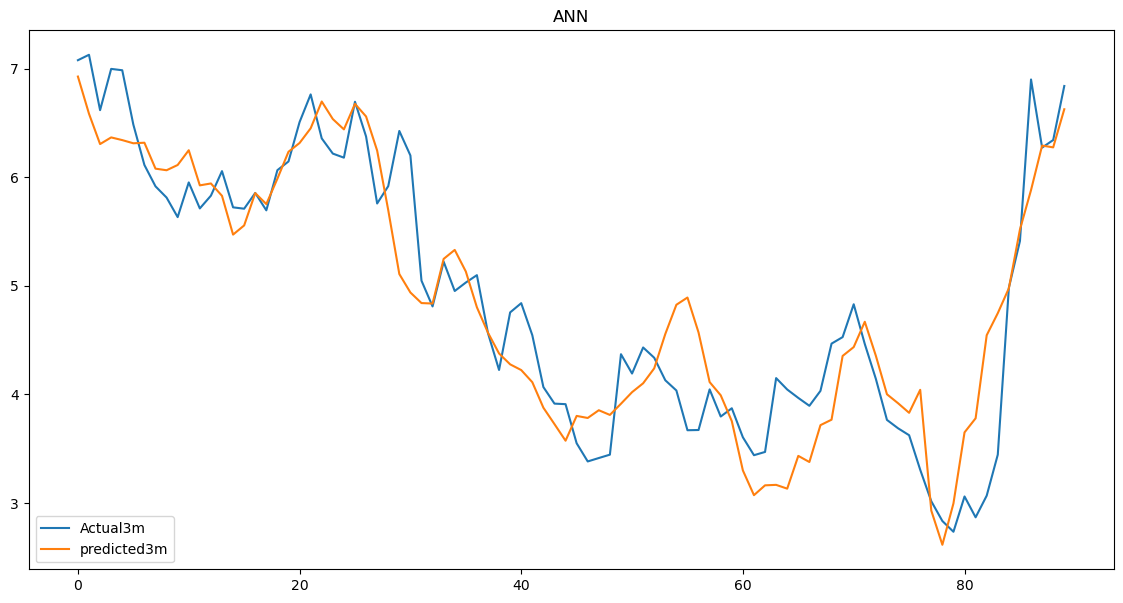

In [15]:
predictions=model.predict(X_scaled)
df['predicted3m']=predictions
df['Actual3m']=df['3monthForecast']
df[['Actual3m',"predicted3m"]].plot(title='ANN',figsize=(14, 7))

In [16]:
mse,mae=model.evaluate(X_scaled,y)
mse


3/3 [==============================] - 0s 8ms/step - loss: 0.2429 - mae: 0.3692


0.24288329482078552

In [17]:
mae

0.36919301748275757

In [18]:
import numpy as np
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse,  
            'corr':corr, 'minmax':minmax})

forecast_accuracy(df['predicted3m'], df['Actual3m'])

{'mape': 0.08468343636583757,
 'me': -0.020338930151197705,
 'mae': 0.36919299979739734,
 'mpe': 0.006084368758821328,
 'mse': 0.24288328595375006,
 'corr': 0.9166971442924807,
 'minmax': 0.07705679824846923}

In [36]:
#6 months forecast
df2=pd.read_csv('mortgage_dataset4.csv')
X1=df2.drop(['3monthForecast','record_date','mortgage_rate','6monthForecast','12monthForecast'],axis=1)
y1=df2[['6monthForecast']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=40)
scaler1=StandardScaler()
scaler1.fit(X1_train)
X1_train_scaled=scaler1.transform(X1_train)
X1_test_scaled=scaler1.transform(X1_test)
X1_scaled=scaler1.transform(X1)

In [40]:
model1 = Sequential()
model1.add(Dense(128,input_dim=8,activation='relu'))        
model1.add(Dense(64,activation='relu'))    
model1.add(Dense(1,activation='linear'))
model1.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
model1.summary()
model1.fit(X1_train_scaled,y1_train,validation_split=0.2,epochs=100)
predictions1=model1.predict(X1_scaled)
df2['predicted6m']=predictions1
df2['Actual6m']=df2['6monthForecast']


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 128)               1152      
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 2s 426ms/step - loss: 26.5443 - mae: 4.9978 - val_loss: 18.8626 - val_mae: 4.2465
Epoch 2/100
2/2 [==============================] - 0s 79ms/step - loss: 23.9550 - mae: 4.7408 - val_loss: 17.2059 - val_mae: 4.0495
Epoch 3/100
2/2 [=

Epoch 57/100
2/2 [==============================] - 0s 87ms/step - loss: 0.3856 - mae: 0.4997 - val_loss: 0.2894 - val_mae: 0.4328
Epoch 58/100
2/2 [==============================] - 0s 84ms/step - loss: 0.3807 - mae: 0.4968 - val_loss: 0.2924 - val_mae: 0.4350
Epoch 59/100
2/2 [==============================] - 0s 84ms/step - loss: 0.3763 - mae: 0.4935 - val_loss: 0.2962 - val_mae: 0.4372
Epoch 60/100
2/2 [==============================] - 0s 82ms/step - loss: 0.3707 - mae: 0.4896 - val_loss: 0.2977 - val_mae: 0.4375
Epoch 61/100
2/2 [==============================] - 0s 80ms/step - loss: 0.3662 - mae: 0.4865 - val_loss: 0.2995 - val_mae: 0.4381
Epoch 62/100
2/2 [==============================] - 0s 83ms/step - loss: 0.3626 - mae: 0.4837 - val_loss: 0.3026 - val_mae: 0.4399
Epoch 63/100
2/2 [==============================] - 0s 85ms/step - loss: 0.3572 - mae: 0.4796 - val_loss: 0.3028 - val_mae: 0.4403
Epoch 64/100
2/2 [==============================] - 0s 81ms/step - loss: 0.3540 - m

<Axes: title={'center': 'ANN2'}>

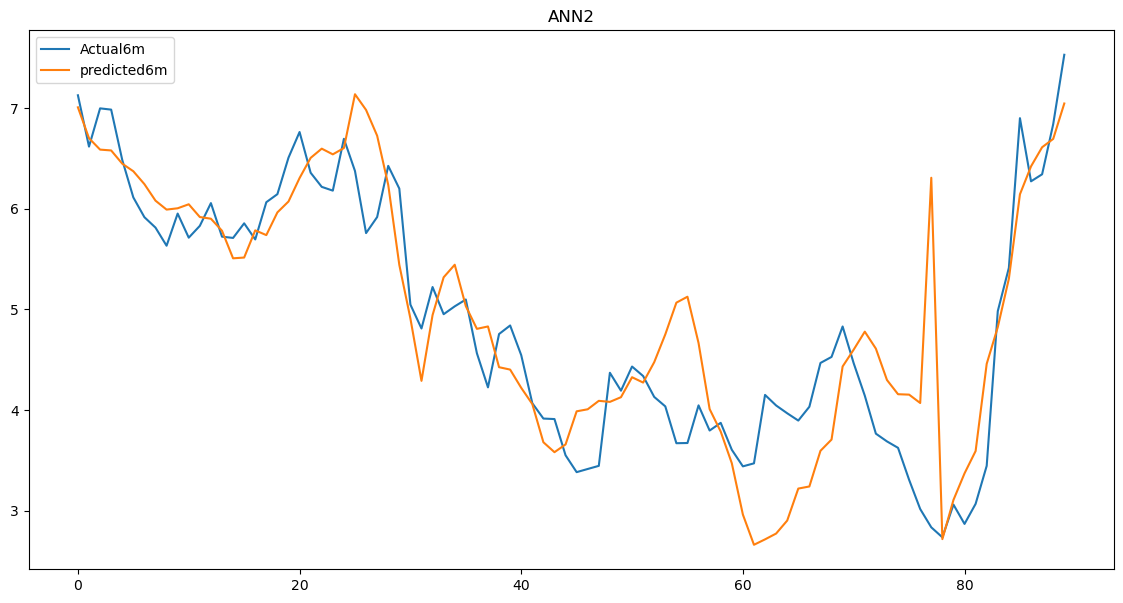

In [39]:
df2[['Actual6m',"predicted6m"]].plot(title='ANN2',figsize=(14, 7))

In [42]:
forecast_accuracy(df2['predicted6m'], df2['Actual6m'])

{'mape': 0.11280092154735062,
 'me': 0.06468694578806554,
 'mae': 0.4618346529430814,
 'mpe': 0.0283439733862466,
 'mse': 0.47546732809526093,
 'corr': 0.8456702876829036,
 'minmax': 0.09446635468709808}

In [64]:
#12 months forecast
df3=pd.read_csv('mortgage_dataset4.csv')
df3.drop(df3.tail(2).index,
        inplace = True)
X2=df3.drop(['3monthForecast','record_date','mortgage_rate','6monthForecast','12monthForecast'],axis=1)
y2=df3[['12monthForecast']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=40)
scaler2=StandardScaler()
scaler2.fit(X2_train)
X2_train_scaled=scaler2.transform(X2_train)
X2_test_scaled=scaler2.transform(X2_test)
X2_scaled=scaler2.transform(X2)

In [65]:
model2 = Sequential()
model2.add(Dense(128,input_dim=8,activation='relu'))        
model2.add(Dense(64,activation='relu'))    
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
model2.summary()
model2.fit(X2_train_scaled,y2_train,validation_split=0.2,epochs=100)
predictions2=model2.predict(X2_scaled)
df3['predicted12m']=predictions2
df3['Actual12m']=df3['12monthForecast']

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               1152      
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 1s 208ms/step - loss: 25.5504 - mae: 4.9032 - val_loss: 18.3223 - val_mae: 4.1483
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 23.4684 - mae: 4.7010 - val_loss: 16.9409 - val_mae: 3.9874
Epoch 3/100
2/2 [=

Epoch 57/100
2/2 [==============================] - 0s 24ms/step - loss: 0.3159 - mae: 0.4519 - val_loss: 0.3789 - val_mae: 0.5032
Epoch 58/100
2/2 [==============================] - 0s 32ms/step - loss: 0.3123 - mae: 0.4499 - val_loss: 0.3810 - val_mae: 0.5064
Epoch 59/100
2/2 [==============================] - 0s 33ms/step - loss: 0.3085 - mae: 0.4466 - val_loss: 0.3809 - val_mae: 0.5079
Epoch 60/100
2/2 [==============================] - 0s 53ms/step - loss: 0.3055 - mae: 0.4437 - val_loss: 0.3806 - val_mae: 0.5087
Epoch 61/100
2/2 [==============================] - 0s 49ms/step - loss: 0.3023 - mae: 0.4406 - val_loss: 0.3786 - val_mae: 0.5076
Epoch 62/100
2/2 [==============================] - 0s 49ms/step - loss: 0.2993 - mae: 0.4379 - val_loss: 0.3776 - val_mae: 0.5071
Epoch 63/100
2/2 [==============================] - 0s 47ms/step - loss: 0.2967 - mae: 0.4359 - val_loss: 0.3754 - val_mae: 0.5049
Epoch 64/100
2/2 [==============================] - 0s 43ms/step - loss: 0.2938 - m

<Axes: title={'center': 'ANN2'}>

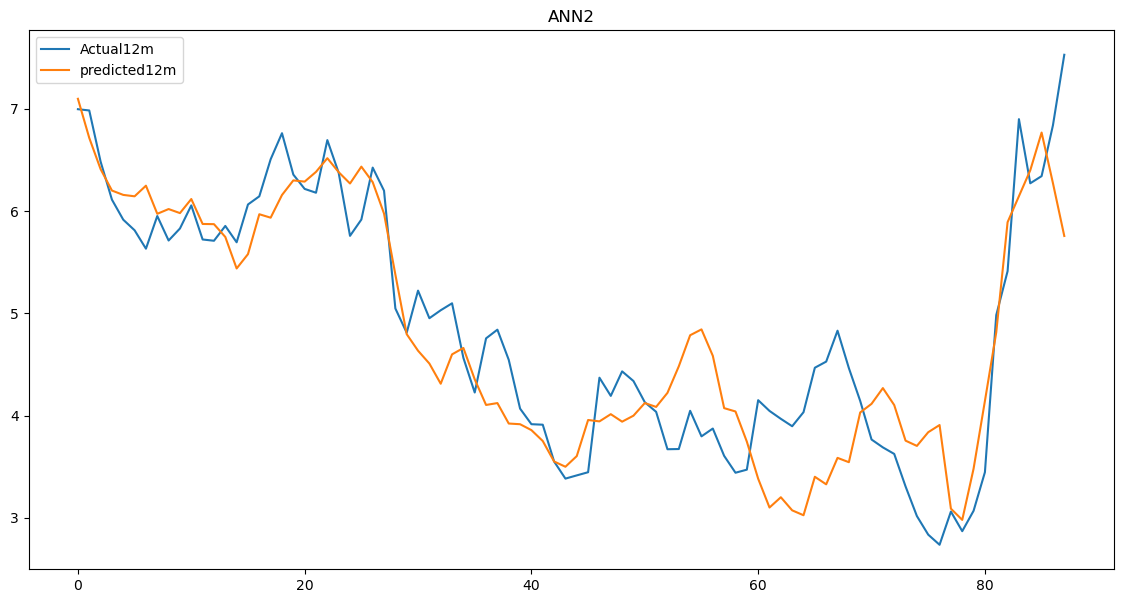

In [67]:
df3[['Actual12m',"predicted12m"]].plot(title='ANN3',figsize=(14, 7))

In [69]:
forecast_accuracy(df3['predicted12m'], df3['Actual12m'])

{'mape': 0.09972493672053012,
 'me': -0.04736552218957388,
 'mae': 0.43762173555114037,
 'mpe': 0.0016140948792522298,
 'mse': 0.31436241826332395,
 'corr': 0.8909919624410765,
 'minmax': 0.09205617602918958}